In [1]:
using PyPlot
using StaticArrays
using ForwardDiff

/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [40]:
import SpatialFields
reload("SpatialFields")

In [41]:
offset = [1, 0]

edge_points = SVector{2, Float64}[[0; 0], [1; 0], [1; 1], [0; 1]]
edge_points = [point + offset for point in edge_points]
interior_points = SVector{2, Float64}[[0.5, 0.5]]
interior_points = [point + offset for point in interior_points]
points = vcat(edge_points, interior_points)
values = vcat([0.0 for i in edge_points], [-1 for i in interior_points])
surface = SpatialFields.InterpolatingSurface(points, values, SpatialFields.XCubed(), true)

(::InterpolatingSurface) (generic function with 1 method)

In [42]:
vis_radius = 5

slope = 3 * sum(surface.weights .* [3/4 * (p[1]^2 + p[2]^2) for p in surface.points])
@show slope

X = linspace(-vis_radius, vis_radius, 101)
Y = linspace(-vis_radius, vis_radius, 101)
Z = [surface([x, y]) for x in X, y in Y];

slope = 1.0000000000000004


In [43]:
[ForwardDiff.gradient(surface, p) for p in surface.points if abs(surface(p)) < 1e-3]

4-element Array{StaticArrays.MVector{2,Float64},1}:
 [-0.666667,-0.666667]
 [0.666667,-0.666667] 
 [0.666667,0.666667]  
 [-0.666667,0.666667] 

In [44]:
ForwardDiff.derivative(t -> surface([t, 0]), 1000)

0.9999998533166948

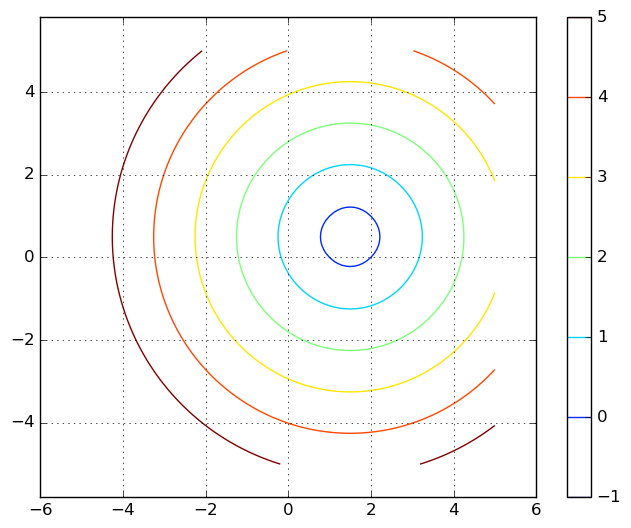

(-6.0,6.0,-6.0,6.0)

In [45]:
PyPlot.contour(X, Y, Z', -1:ceil(vis_radius / 10):vis_radius)
hold(true)
grid()
colorbar()
axis("equal")

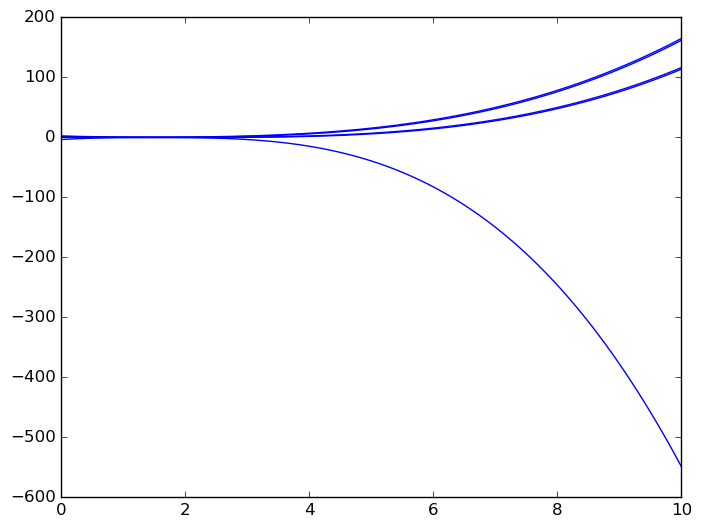

In [46]:
hold(true)
x = linspace(0, 10, 101)
for (i, point) in enumerate(surface.points)
    plot(x, [surface.weights[i] * norm([xi, 0.0] - point)^3 for xi in x], "b-")
end

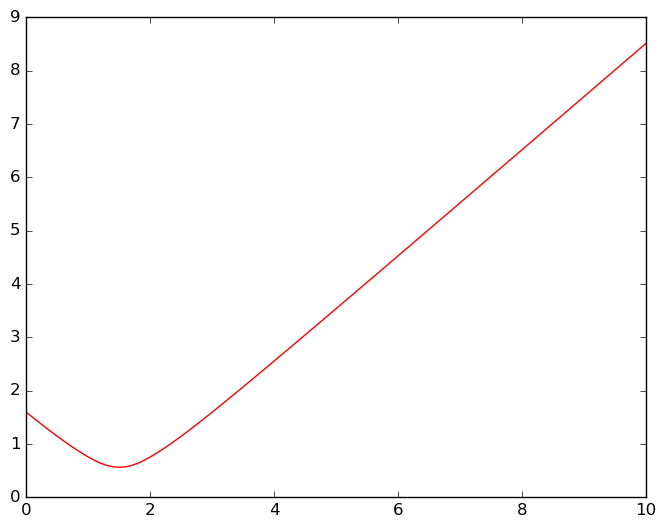

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7feb9df03190>

In [47]:
plot(x, [sum(surface.weights[i] * norm([xi, 0.0] - surface.points[i])^3 for i in 1:length(surface.weights)) for xi in x], "r-")


In [52]:
offset = [0, 0, 0]

edge_points = SVector{3, Float64}[]
for ax in [1, 2, 3]
    for val in [-2, 2]
        p = [0, 0, 0]
        p[ax] = val
        push!(edge_points, p)
    end
end
edge_points = [point + offset for point in edge_points]
interior_points = SVector{3, Float64}[[0, 0, 0]]
interior_points = [point + offset for point in interior_points]
points = vcat(edge_points, interior_points)
values = vcat([0.0 for i in edge_points], [-1 for i in interior_points])
surface = SpatialFields.InterpolatingSurface(points, values, SpatialFields.XCubed(), true)

vis_radius = 5
slope = 3 * sum(surface.weights .* [2/3 * (p[1]^2 + p[2]^2 + p[3]^2) for p in surface.points])
@show slope

slope = 1.0


1.0

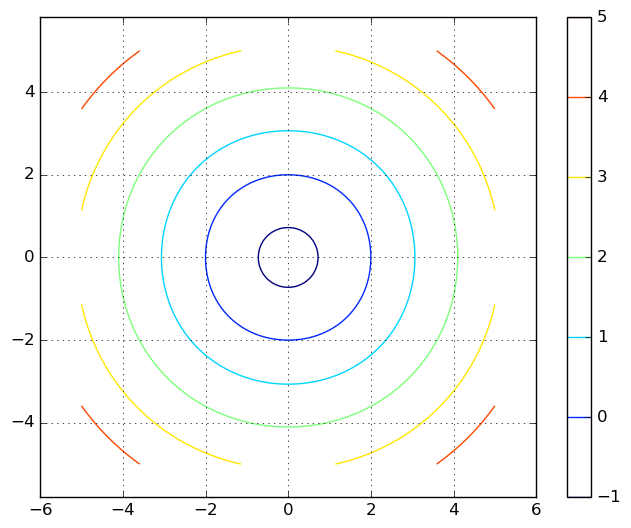

(-6.0,6.0,-6.0,6.0)

In [53]:
X = linspace(-vis_radius, vis_radius, 101)
Y = linspace(-vis_radius, vis_radius, 101)
Z = [surface([x, y, 0]) for x in X, y in Y];

PyPlot.contour(X, Y, Z', -1:ceil(vis_radius / 10):vis_radius)
hold(true)
grid()
colorbar()
axis("equal")